In [1]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt

In [6]:
df_main = pd.read_csv(r'D:\CORONA_Tweets\back_up_from_lab_15-04\coronatweets\CoronaVaccine2\covidvaccine.csv')
print(df_main.shape)
df_main.head(10)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(183493, 13)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,False
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,False
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,Twitter for Android,False
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False
5,Raunak Scherbatsky DankWorth,NaN,Neuro surgeon + Diagnostician.👨‍⚕️\na good phy...,03-08-2020 13:39,3.0,27.0,918.0,False,18-08-2020 12:44,The Multi-system Inflammatory Syndrome-Childre...,"['COVID19', 'COVID19India']",Twitter for Android,False
6,Rajesh Tadepalli,"Hyderabad, India",Growth Initiatives @tech_mahindra | AIMer | Br...,07-05-2013 03:57,918.0,2561.0,31837.0,False,18-08-2020 12:34,@PrivilRodrigues @yatish57 @deepkaranahuja @sh...,NaN,Twitter for Android,False
7,AKisASocialisolationist wash yer damn hands,The Great Pacific Northwest,"Iconoclast, cat person, soccer fan, textile & ...",07-02-2015 07:24,2321.0,3236.0,264351.0,False,18-08-2020 12:30,"@MSNBC Well, let’s qualify that: would anyone ...",['CovidVaccine'],Twitter for iPhone,False
8,Dr. Joseph Santoro,"Washington, DC 20009","Neuro PhD, #Innovator, #Technologist, #Startup...",17-01-2009 21:10,19091.0,20986.0,128119.0,False,18-08-2020 12:15,"Most countries, without the ability to make #V...",['Vaccines'],Hootsuite Inc.,False
9,VUMC OAP,"Nashville, TN","Office of Advanced Practice, Vanderbilt Univer...",16-03-2017 20:22,282.0,96.0,788.0,False,18-08-2020 11:57,#DNA zooms up charts in 1st week; hear #vacci...,"['DNA', 'vaccines', 'pandemic', 'COVID19', 'Co...",Twitter Web App,False


In [7]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183493 entries, 0 to 183492
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         183488 non-null  object 
 1   user_location     145500 non-null  object 
 2   user_description  173256 non-null  object 
 3   user_created      183489 non-null  object 
 4   user_followers    183488 non-null  float64
 5   user_friends      183488 non-null  object 
 6   user_favourites   183488 non-null  object 
 7   user_verified     183488 non-null  object 
 8   date              183487 non-null  object 
 9   text              183488 non-null  object 
 10  hashtags          125659 non-null  object 
 11  source            182371 non-null  object 
 12  is_retweet        183483 non-null  object 
dtypes: float64(1), object(12)
memory usage: 18.2+ MB


In [8]:
df_main['text'] = df_main['text'].astype(str)

In [9]:
df_main['text'][14]

'The whole narrative on the #CovidVaccine has gone deathly silent! #ChinaVirus #COVID19India'

In [10]:
df = pd.read_csv(r'D:\CORONA_Tweets\back_up_from_lab_15-04\coronatweets\CoronaVaccine2\covidvaccine.csv')
df['text'] = df['text'].astype(str)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
from bs4 import BeautifulSoup

from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = df.text
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
len(test_result)

183493

In [12]:
df['text'] = test_result

In [13]:
print(df.shape)
df.head(10)

(183493, 13)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,australia to manufacture covid vaccine and giv...,['CovidVaccine'],Twitter Web App,False
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,coronavirusvaccine coronavaccine covidvaccine ...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,deaths due to covid in affected countries read...,NaN,Twitter Web App,False
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,subhashree stay safe di da,NaN,Twitter for Android,False
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,this is what passes for leadership in our coun...,NaN,Twitter Web App,False
5,Raunak Scherbatsky DankWorth,NaN,Neuro surgeon + Diagnostician.👨‍⚕️\na good phy...,03-08-2020 13:39,3.0,27.0,918.0,False,18-08-2020 12:44,the multi system inflammatory syndrome childre...,"['COVID19', 'COVID19India']",Twitter for Android,False
6,Rajesh Tadepalli,"Hyderabad, India",Growth Initiatives @tech_mahindra | AIMer | Br...,07-05-2013 03:57,918.0,2561.0,31837.0,False,18-08-2020 12:34,,NaN,Twitter for Android,False
7,AKisASocialisolationist wash yer damn hands,The Great Pacific Northwest,"Iconoclast, cat person, soccer fan, textile & ...",07-02-2015 07:24,2321.0,3236.0,264351.0,False,18-08-2020 12:30,well let s qualify that would anyone of any pa...,['CovidVaccine'],Twitter for iPhone,False
8,Dr. Joseph Santoro,"Washington, DC 20009","Neuro PhD, #Innovator, #Technologist, #Startup...",17-01-2009 21:10,19091.0,20986.0,128119.0,False,18-08-2020 12:15,most countries without the ability to make vac...,['Vaccines'],Hootsuite Inc.,False
9,VUMC OAP,"Nashville, TN","Office of Advanced Practice, Vanderbilt Univer...",16-03-2017 20:22,282.0,96.0,788.0,False,18-08-2020 11:57,dna zooms up charts in st week hear vaccines e...,"['DNA', 'vaccines', 'pandemic', 'COVID19', 'Co...",Twitter Web App,False


In [14]:
import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Himanshu
[nltk_data]     Beniwal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
nltk.download('wordnet')
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['text'].apply(lambda x: tokenization(x.lower()))

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))

ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))

wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))

print(df.shape)
df.head(10)

[nltk_data] Downloading package wordnet to C:\Users\Himanshu
[nltk_data]     Beniwal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
(183493, 17)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,australia manufacture covid vaccine give citiz...,['CovidVaccine'],Twitter Web App,False,"[australia, manufacture, covid, vaccine, give,...","[australia, manufacture, covid, vaccine, give,...","[australia, manufactur, covid, vaccin, give, c...","[australia, manufacture, covid, vaccine, give,..."
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,coronavirusvaccine coronavaccine covidvaccine ...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False,"[coronavirusvaccine, coronavaccine, covidvacci...","[coronavirusvaccine, coronavaccine, covidvacci...","[coronavirusvaccin, coronavaccin, covidvaccin,...","[coronavirusvaccine, coronavaccine, covidvacci..."
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,deaths covid affected countries read more piryani,NaN,Twitter Web App,False,"[deaths, covid, affected, countries, read, mor...","[deaths, covid, affected, countries, read, pir...","[death, covid, affect, countri, read, piryani]","[death, covid, affected, country, read, piryani]"
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,subhashree stay safe,NaN,Twitter for Android,False,"[subhashree, stay, safe]","[subhashree, stay, safe]","[subhashre, stay, safe]","[subhashree, stay, safe]"
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,this what passes leadership country voucher so...,NaN,Twitter Web App,False,"[this, what, passes, leadership, country, vouc...","[passes, leadership, country, voucher, something]","[pass, leadership, countri, voucher, someth]","[pass, leadership, country, voucher, something]"
5,Raunak Scherbatsky DankWorth,NaN,Neuro surgeon + Diagnostician.👨‍⚕️\na good phy...,03-08-2020 13:39,3.0,27.0,918.0,False,18-08-2020 12:44,multi system inflammatory syndrome children co...,"['COVID19', 'COVID19India']",Twitter for Android,False,"[multi, system, inflammatory, syndrome, childr...","[multi, system, inflammatory, syndrome, childr...","[multi, system, inflammatori, syndrom, childre...","[multi, system, inflammatory, syndrome, child,..."
6,Rajesh Tadepalli,"Hyderabad, India",Growth Initiatives @tech_mahindra | AIMer | Br...,07-05-2013 03:57,918.0,2561.0,31837.0,False,18-08-2020 12:34,,NaN,Twitter for Android,False,[],[],[],[]
7,AKisASocialisolationist wash yer damn hands,The Great Pacific Northwest,"Iconoclast, cat person, soccer fan, textile & ...",07-02-2015 07:24,2321.0,3236.0,264351.0,False,18-08-2020 12:30,well qualify that would anyone party vaccine r...,['CovidVaccine'],Twitter for iPhone,False,"[well, qualify, that, would, anyone, party, va...","[well, qualify, would, anyone, party, vaccine,...","[well, qualifi, would, anyon, parti, vaccin, r...","[well, qualify, would, anyone, party, vaccine,..."
8,Dr. Joseph Santoro,"Washington, DC 20009","Neuro PhD, #Innovator, #Technologist, #Startup...",17-01-2009 21:10,19091.0,20986.0,128119.0,False,18-08-2020 12:15,most countries without ability make vaccines l...,['Vaccines'],Hootsuite Inc.,False,"[most, countries, without, ability, make, vacc...","[countries, without, ability, make, vaccines, ...","[countri, without, abil, make, vaccin, local, ...","[country, without, ability, make, vaccine, loc..."
9,VUMC OAP,"Nashville, TN","Office of Advanced Practice, Vanderbilt Univer...",16-03-2017 20:22,282.0,96.0,788.0,False,18-08-2020 11:57,zooms charts week hear vaccines episode pandem...,"['DNA', 'vaccines', 'pandemic', 'COVID19'

In [16]:
print(df_main['text'][147])
print(df['text'][147])
print(df['Tweet_tokenized'][147])
print(df['Tweet_nonstop'][147])
print(df['Tweet_stemmed'][147])
print(df['Tweet_lemmatized'][147])

To change the course of the #COVID19 pandemic, @FujifilmDiosyn have expanded their partnership with @Novavax to man… https://t.co/ieZfTtmVpn
change course covid pandemic have expanded their partnership with
['change', 'course', 'covid', 'pandemic', 'have', 'expanded', 'their', 'partnership', 'with']
['change', 'course', 'covid', 'pandemic', 'expanded', 'partnership']
['chang', 'cours', 'covid', 'pandem', 'expand', 'partnership']
['change', 'course', 'covid', 'pandemic', 'expanded', 'partnership']


In [17]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to C:\Users\Himanshu
[nltk_data]     Beniwal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


C:\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [18]:
vds = SentimentIntensityAnalyzer()
txt = df['text'][147]
print(txt)
vds.polarity_scores(txt)

change course covid pandemic have expanded their partnership with


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

 1    81660
 0    69459
-1    32374
Name: sentiment, dtype: int64  1    0.445031
 0    0.378538
-1    0.176432
Name: sentiment, dtype: float64


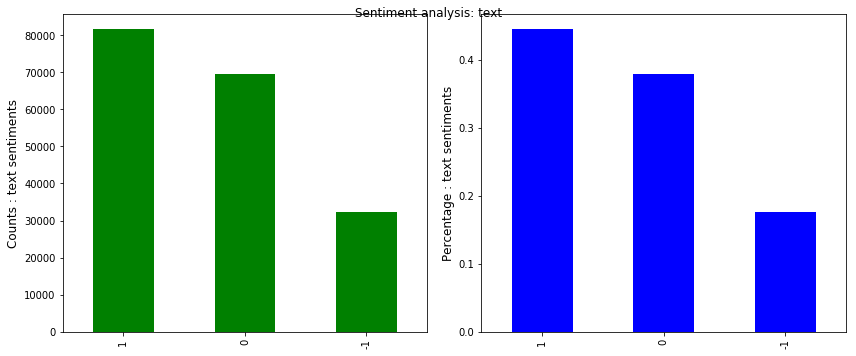

In [19]:
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return int(1)
    elif sia.polarity_scores(post)["compound"] < 0:
        return int(-1)
    else:
        return int(0) 
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)
    print(counts, percent)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()
df['sentiment'] = df['text'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'sentiment', 'text')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183493 entries, 0 to 183492
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         183488 non-null  object 
 1   user_location     145500 non-null  object 
 2   user_description  173256 non-null  object 
 3   user_created      183489 non-null  object 
 4   user_followers    183488 non-null  float64
 5   user_friends      183488 non-null  object 
 6   user_favourites   183488 non-null  object 
 7   user_verified     183488 non-null  object 
 8   date              183487 non-null  object 
 9   text              183493 non-null  object 
 10  hashtags          125659 non-null  object 
 11  source            182371 non-null  object 
 12  is_retweet        183483 non-null  object 
 13  Tweet_tokenized   183493 non-null  object 
 14  Tweet_nonstop     183493 non-null  object 
 15  Tweet_stemmed     183493 non-null  object 
 16  Tweet_lemmatized  18

In [21]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,sentiment
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,australia manufacture covid vaccine give citiz...,['CovidVaccine'],Twitter Web App,False,"[australia, manufacture, covid, vaccine, give,...","[australia, manufacture, covid, vaccine, give,...","[australia, manufactur, covid, vaccin, give, c...","[australia, manufacture, covid, vaccine, give,...",1
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,coronavirusvaccine coronavaccine covidvaccine ...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False,"[coronavirusvaccine, coronavaccine, covidvacci...","[coronavirusvaccine, coronavaccine, covidvacci...","[coronavirusvaccin, coronavaccin, covidvaccin,...","[coronavirusvaccine, coronavaccine, covidvacci...",1
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,deaths covid affected countries read more piryani,NaN,Twitter Web App,False,"[deaths, covid, affected, countries, read, mor...","[deaths, covid, affected, countries, read, pir...","[death, covid, affect, countri, read, piryani]","[death, covid, affected, country, read, piryani]",-1
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,subhashree stay safe,NaN,Twitter for Android,False,"[subhashree, stay, safe]","[subhashree, stay, safe]","[subhashre, stay, safe]","[subhashree, stay, safe]",1
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,this what passes leadership country voucher so...,NaN,Twitter Web App,False,"[this, what, passes, leadership, country, vouc...","[passes, leadership, country, voucher, something]","[pass, leadership, countri, voucher, someth]","[pass, leadership, country, voucher, something]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183488,Rossendale Council,"Rossendale, Lancashire",News and updates from Rossendale Borough Counc...,2010-03-18 18:41:19,7584.0,545,1662,True,2021-03-18 14:02:48,cannot catch coronavirus from covidvaccine the...,['COVIDVaccine'],Hootsuite Inc.,False,"[cannot, catch, coronavirus, from, covidvaccin...","[cannot, catch, coronavirus, covidvaccine, mis...","[cannot, catch, coronaviru, covidvaccin, misin...","[cannot, catch, coronavirus, covidvaccine, mis...",0
183489,Haringey,"Haringey, London",Haringey news and updates on everything happen...,2011-01-17 09:49:28,21898.0,994,2588,True,2021-03-18 14:02:43,miss covidvaccine clinic this sunday heart tot...,"['COVIDVaccine', 'N15']",Hootsuite Inc.,False,"[miss, covidvaccine, clinic, this, sunday, hea...","[miss, covidvaccine, clinic, sunday, heart, to...","[miss, covidvaccin, clinic, sunday, heart, tot...","[miss, covidvaccine, clinic, sunday, heart, to...",1
183490,Alex Fernando,"Lincoln, NE",Recruitment Coordinator at CoJMC | College Foo...,2017-11-13 06:11:40,278.0,600,10938,False,2021-03-18 14:02:31,pretty amazing that just over year since start...,NaN,Twitter for iPhone,False,"[pretty, amazing, that, just, over, year, sinc...","[pretty, amazing, year, since, started, vaccin...","[pretti, amaz, year, sinc, start, vaccin, inje...","[pretty, amazing, year, since, started, vaccin...",1
183491,𝖘𝖐𝖎𝖓𝖉𝖊𝖊𝖕𝖙𝖊𝖆𝖗𝖘,Somerset,"‡ #poet • #writer ‡ ♠ ""loves a nice cuppa"" ☕ *...",2019-11-19 13:16:59,133.0,398,2040,False,2021-03-18 14:02:20,received tuesday grateful overwhelmed care lov...,NaN,Twitter Web App,False,"[received, tuesday, grateful, overwhelmed, car...","[received, tuesday, grateful, overwhelmed, car...","[receiv, tuesday, grate, overwhelm, care, l

In [22]:
df['text_len'] = df['Tweet_lemmatized'].apply(lambda x: len(x))
df['text_len_full'] = df['text'].apply(lambda x: len(x))

In [23]:
max(df['text_len_full'])

127

In [24]:
X_main=df.text.values
y=df.sentiment.values

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import time
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score
logres = LogisticRegression(random_state=0)
X_main=df.text.values
y=df.sentiment.values
X_train, X_test, Y_train, Y_test = train_test_split(X_main, y, test_size=0.1, random_state=27)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(165143,)
(165143,)
(18350,)
(18350,)


# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import time
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score
logres = LogisticRegression(random_state=0)
X_main=df.text.values
y=df.sentiment.values
X_train, X_test, Y_train, Y_test = train_test_split(X_main, y, test_size=0.1, random_state=27)
pipe = Pipeline([('vect', CountVectorizer(binary=False,min_df=0.0,max_df=1.0 , ngram_range=(1,1))),
                 ('tfidf', TfidfTransformer()),
                 ('model', logres)])
# Perform classification with SVM, kernel=linear
#classifier_linear = svm.SVC(kernel='linear')
print("Starting training...")
t0 = time.time()
pipe.fit(X_train, Y_train)
t1 = time.time()
print("Training Finished, now begining the predictions... 😊")
prediction_linear = pipe.predict(X_test)
t2 = time.time()
print("Prediction completed. 😎")
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
print(classification_report(Y_test, prediction_linear))
print(accuracy_score(Y_test, prediction_linear))

Starting training...
Training Finished, now begining the predictions... 😊
Prediction completed. 😎
Training time: 5.237678s; Prediction time: 0.140590s
             precision    recall  f1-score   support

         -1       0.95      0.76      0.84      3221
          0       0.89      0.99      0.94      6929
          1       0.96      0.94      0.95      8200

avg / total       0.93      0.93      0.93     18350

0.9293732970027248


In [22]:

# Decision Tree
from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import time
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score
dt = tree.DecisionTreeClassifier()
X_main=df.text.values
y=df.sentiment.values
X_train, X_test, Y_train, Y_test = train_test_split(X_main, y, test_size=0.1, random_state=27)
pipe = Pipeline([('vect', CountVectorizer(binary=False,min_df=0.0,max_df=1.0 , ngram_range=(1,1))),
                 ('tfidf', TfidfTransformer()),
                 ('model', dt)])
# Perform classification with SVM, kernel=linear
#classifier_linear = svm.SVC(kernel='linear')
print("Starting training...")
t0 = time.time()
pipe.fit(X_train, Y_train)
t1 = time.time()
print("Training Finished, now begining the predictions... 😊")
prediction_linear = pipe.predict(X_test)
t2 = time.time()
print("Prediction completed. 😎")
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
print(classification_report(Y_test, prediction_linear))
print(accuracy_score(Y_test, prediction_linear))

Starting training...


C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


Training Finished, now begining the predictions... 😊
Prediction completed. 😎
Training time: 133.960509s; Prediction time: 0.156206s
             precision    recall  f1-score   support

         -1       0.84      0.76      0.80      3221
          0       0.92      0.97      0.95      6929
          1       0.93      0.92      0.93      8200

avg / total       0.91      0.91      0.91     18350

0.9143869209809264


In [23]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score
xgb = XGBClassifier()
X_main=df.text.values
y=df.sentiment.values
X_train, X_test, Y_train, Y_test = train_test_split(X_main, y, test_size=0.1, random_state=27)
pipe = Pipeline([('vect', CountVectorizer(binary=False,min_df=0.0,max_df=1.0 , ngram_range=(1,1))),
                 ('tfidf', TfidfTransformer()),
                 ('model', xgb)])
# Perform classification with SVM, kernel=linear
#classifier_linear = svm.SVC(kernel='linear')
print("Starting training...")
t0 = time.time()
pipe.fit(X_train, Y_train)
t1 = time.time()
print("Training Finished, now begining the predictions... 😊")
prediction_linear = pipe.predict(X_test)
t2 = time.time()
print("Prediction completed. 😎")
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
print(classification_report(Y_test, prediction_linear))
print(accuracy_score(Y_test, prediction_linear))

Starting training...


C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:07:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Finished, now begining the predictions... 😊
Prediction completed. 😎
Training time: 36.914052s; Prediction time: 0.302192s
             precision    recall  f1-score   support

         -1       0.93      0.49      0.64      3221
          0       0.72      1.00      0.83      6929
          1       0.95      0.81      0.88      8200

avg / total       0.86      0.83      0.82     18350

0.8259945504087194


C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [24]:
from sklearn.pipeline import Pipeline
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB()


X_main=df.text.values
y=df.sentiment.values
X_train, X_test, Y_train, Y_test = train_test_split(X_main, y, test_size=0.1, random_state=27)
pipe = Pipeline([('vect', CountVectorizer(binary=False,min_df=0.0,max_df=1.0 , ngram_range=(1,1))),
                 ('tfidf', TfidfTransformer()),
                 ('model', gnb)])
# Perform classification with SVM, kernel=linear
#classifier_linear = svm.SVC(kernel='linear')

print("Starting training...")
t0 = time.time()
pipe.fit(X_train, Y_train)
t1 = time.time()
print("Training Finished, now begining the predictions... 😊")
prediction_linear = pipe.predict(X_test)
t2 = time.time()
print("Prediction completed. 😎")
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
print(classification_report(Y_test, prediction_linear))
print(accuracy_score(Y_test, prediction_linear))

Starting training...
Training Finished, now begining the predictions... 😊
Prediction completed. 😎
Training time: 1.404183s; Prediction time: 0.124969s
             precision    recall  f1-score   support

         -1       0.94      0.37      0.53      3221
          0       0.93      0.76      0.83      6929
          1       0.70      0.98      0.82      8200

avg / total       0.83      0.79      0.77     18350

0.7885013623978202


In [25]:
from sklearn.pipeline import Pipeline
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
ada = GradientBoostingClassifier(random_state=0, learning_rate=0.01)


X_main=df.text.values
y=df.sentiment.values
X_train, X_test, Y_train, Y_test = train_test_split(X_main, y, test_size=0.1, random_state=27)
pipe = Pipeline([('vect', CountVectorizer(binary=False,min_df=0.0,max_df=1.0 , ngram_range=(1,1))),
                 ('tfidf', TfidfTransformer()),
                 ('model', ada)])
# Perform classification with SVM, kernel=linear
#classifier_linear = svm.SVC(kernel='linear')

print("Starting training...")
t0 = time.time()
pipe.fit(X_train, Y_train)
t1 = time.time()
print("Training Finished, now begining the predictions... 😊")
prediction_linear = pipe.predict(X_test)
t2 = time.time()
print("Prediction completed. 😎")
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
print(classification_report(Y_test, prediction_linear))
print(accuracy_score(Y_test, prediction_linear))

Starting training...


C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `

C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:753: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:753: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == 

C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:753: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:753: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == 

C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:753: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:753: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == 

C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:753: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:753: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == 

C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:753: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:753: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == 

C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:753: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:753: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == 

Training Finished, now begining the predictions... 😊
Prediction completed. 😎
Training time: 127.341402s; Prediction time: 0.187455s
             precision    recall  f1-score   support

         -1       0.85      0.09      0.17      3221
          0       0.64      0.28      0.39      6929
          1       0.49      0.90      0.63      8200

avg / total       0.61      0.52      0.46     18350

0.5209264305177111


In [27]:
from sklearn.pipeline import Pipeline
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)


X_main=df.text.values
y=df.sentiment.values
X_train, X_test, Y_train, Y_test = train_test_split(X_main, y, test_size=0.1, random_state=27)
pipe = Pipeline([('vect', CountVectorizer(binary=False,min_df=0.0,max_df=1.0 , ngram_range=(1,1))),
                 ('tfidf', TfidfTransformer()),
                 ('model', ada)])
# Perform classification with SVM, kernel=linear
#classifier_linear = svm.SVC(kernel='linear')

print("Starting training...")
t0 = time.time()
pipe.fit(X_train, Y_train)
t1 = time.time()
print("Training Finished, now begining the predictions... 😊")
prediction_linear = pipe.predict(X_test)
t2 = time.time()
print("Prediction completed. 😎")
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
print(classification_report(Y_test, prediction_linear))
print(accuracy_score(Y_test, prediction_linear))

Starting training...


C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:900: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.estimators_ = np.empty((0, 0), dtype=np.object)
C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:890: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.object)
C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1055: DeprecationWarning: `np.

C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:753: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:753: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == 

C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:753: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:753: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == 

C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:753: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:753: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == 

C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:753: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:753: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == 

C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:753: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:753: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == 

C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:753: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool


Training Finished, now begining the predictions... 😊
Prediction completed. 😎
Training time: 147.858416s; Prediction time: 0.191488s
             precision    recall  f1-score   support

         -1       0.85      0.09      0.17      3221
          0       0.64      0.28      0.39      6929
          1       0.49      0.90      0.63      8200

avg / total       0.61      0.52      0.46     18350

0.5209264305177111
